## Homework 1
Ondřej Hladůvka

If you want to run this code yourself, you can found original notebook here:
https://git.hladu.xyz/hladu357/TalTech_crypt/src/branch/master/hw1

### Task 1
Assume that the Affine cipher is implemented in Z97, not in Z26. (Imagine that we just extended
alphabet, added a set of special symbols. But the first 26 letters stay the same as in English alphabet.)

1. Write down encryption and decryption functions for this modification of Affine cipher.

In [1]:
#For modulo 26:
#Enc(pt_char) = a · pt_char + b( mod 26)
#Dec(ct_char) = a^−1 · (ct_char − b)( mod 26)
#where a^−1 is multiplicative inverse of a modulo 26

# for other modulos we just need to find multiplicative inverses in it
import math

# multiplicative inverse of a modulo 97
def inverse_mod97(i : int):
    return pow(i, -1, 97)

def encrypt_mod97(pt_char : int, a_k : int, b_k : int):
    return (a_k * pt_char + b_k) % 97

def decrypt_mod97(ct_char : int, a_k : int, b_k : int):
    return (inverse_mod97(a_k) * (ct_char - b)) % 97

2. What is the number of possible keys?

In [102]:
from math import gcd

# eulers totient function
def euler(n : int):
    amount = 0        
    for k in range(1, n + 1):
        if gcd(n, k) == 1:
            amount += 1
    return amount

print("Possible independent multiplicative key parts:", euler(97))
print("Possible independent additive key parts:", 97)
print("All possible keys:", euler(97) * 97) # combinatorics multiplication principle

Possible independent multiplicative key parts: 96
Possible independent additive key parts: 97
All possible keys: 9312


3. Suppose that modulus p = 97 is public. Malicious Eve intercepts 3-letter ciphertext c = 28 83 43.
Assume that Eve also knows corresponding plaintext m = D O G. Find out the encryption key,
decryption key and use it to decrypt message c
′
= 78 23 33 (The result should be 3-letter airport
code).

In [103]:
mod = 97
ct1 = [28, 83, 43]
pt1 = [ord(x) - ord('A') for x in ['D', 'O', 'G']] # convert plaintext to ints
pt2 = ""
ct2 = [78, 23, 33]

# print equations
for p, c in zip(pt1, ct1):
    print(f"{c} = a * {p} + b (mod {mod})")
print()

print("we will subtract the first equation from the second to cancel out b \n")
print(f"{ct1[1]} - {ct1[0]} = a * {pt1[1]} - (a * {pt1[0]}) (mod {mod})")
print()

# calncel out b ##################################
left = ct1[1] - ct1[0]
right = pt1[1] - pt1[0]

print(f"{left} = a * {right} (mod {mod})")
print()

# find inverse to get value of a ##################
right_inv = inverse_mod97(right)
a = (left * right_inv) % mod

print(f"multiply by the inverse to get a -> {right}^-1 (mod {mod}) == {right_inv}")
print(f"{a} = {(right * right_inv) % mod} * a (mod {mod})")
print(f"a = {a} \n")
print()

# get value of b ################################
right = a * pt1[0]
b = ct1[0] - right

print("get b from the first equation")
print(f"{ct1[0]} = {a} * {pt1[0]} + b (mod {mod})")
print(f"{b} = {a * pt1[0] - right} + b (mod {mod})")
print(f"b = {b}")
print()

# verify against third equation #################
print("check correctness against third equation")
print(f"{ct1[2]} = {a} * {pt1[2]} + {b} (mod {mod})")
print(f"{ct1[2]} = {a * pt1[2] + b} (mod {mod})")
print()

# decrypt ct2 ###################################
print("we can now decrypt pt2:")
for ct in ct2:
    pt = decrypt_mod97(ct, a, b)
    pt2 += chr(ord('A') + pt)
    print(f"Dec({ct}) = {pt} => {chr(ord('A') + pt)}")
print()

# resolve airport code #########################
import requests 
response = requests.get("https://airport-data.com/api/ap_info.json?iata=" + pt2)
data = response.json()
if response.status_code == 200:
    if data['icao'] is None:
        print("Airport not found")
    else:
        print(f"Airport is {data['name']} in {data['country']}")
else:
    print("api error, cant resolve airport code :(")

28 = a * 3 + b (mod 97)
83 = a * 14 + b (mod 97)
43 = a * 6 + b (mod 97)

we will subtract the first equation from the second to cancel out b 

83 - 28 = a * 14 - (a * 3) (mod 97)

55 = a * 11 (mod 97)

multiply by the inverse to get a -> 11^-1 (mod 97) == 53
5 = 1 * a (mod 97)
a = 5 


get b from the first equation
28 = 5 * 3 + b (mod 97)
13 = 0 + b (mod 97)
b = 13

check correctness against third equation
43 = 5 * 6 + 13 (mod 97)
43 = 43 (mod 97)

we can now decrypt pt2:
Dec(78) = 13 => N
Dec(23) = 2 => C
Dec(33) = 4 => E

Airport is Nice Côte d'Azur Airport in France


### Task 2
This task is on constructing frequency diagrams:
- Find and write down paragraph of English plaintext. It should be at most 600 letters long.

In [104]:
plaintext = """
According to all known laws of aviation, there is no way a bee should be able to fly.
Its wings are too small to get its fat little body off the ground.
The bee, of course, flies anyway because bees don't care what humans think is impossible.
Yellow, black. Yellow, black. Yellow, black. Yellow, black.
Ooh, black and yellow!
Let's shake it up a little.
Barry! Breakfast is ready!
Coming!
Hang on a second.
Hello?
Barry?
Adam?
Can you believe this is happening?
I can't.
I'll pick you up.
Looking sharp.
Use the stairs, Your father paid good money for those.
Sorry. I'm excited.
Here's the graduate.
"""

1. Construct frequency diagram for the chosen plaintext.

Plaintext frequency diagram:


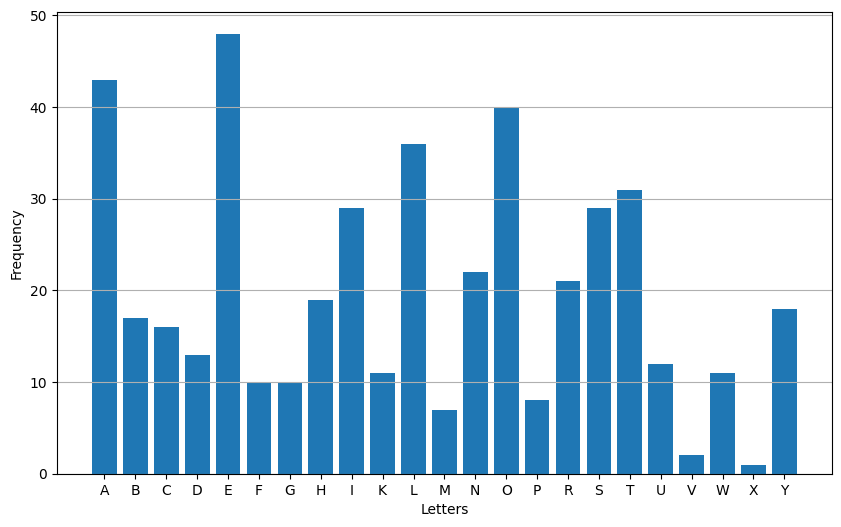

In [105]:
import matplotlib.pyplot as plt
from collections import Counter

# filter just letters and convert to uppercase
plaintext = ''.join(filter(str.isalpha, plaintext.upper()))
 
# calculate and plot frequencies with matplotlib
def freq_plot(text : str) :
    letter_counts = Counter(text)
    letters = sorted(letter_counts.keys())
    frequencies = [letter_counts[letter] for letter in letters]

    plt.figure(figsize=(10, 6))
    plt.bar(letters, frequencies)
    plt.xlabel('Letters')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

print("Plaintext frequency diagram:")
freq_plot(plaintext)

2. Encrypt your plaintext with shift cipher, permutation cipher, Vigenère cipher and construct frequency
diagrams for the corresponding ciphertexts. You may choose any suitable keys for the ciphers.

Using shift cipher with key: 7
we will get ciphertext: ['H', 'J', 'J', 'V', 'Y', 'K', 'P', 'U', 'N', 'A']...
with frequency diagram:


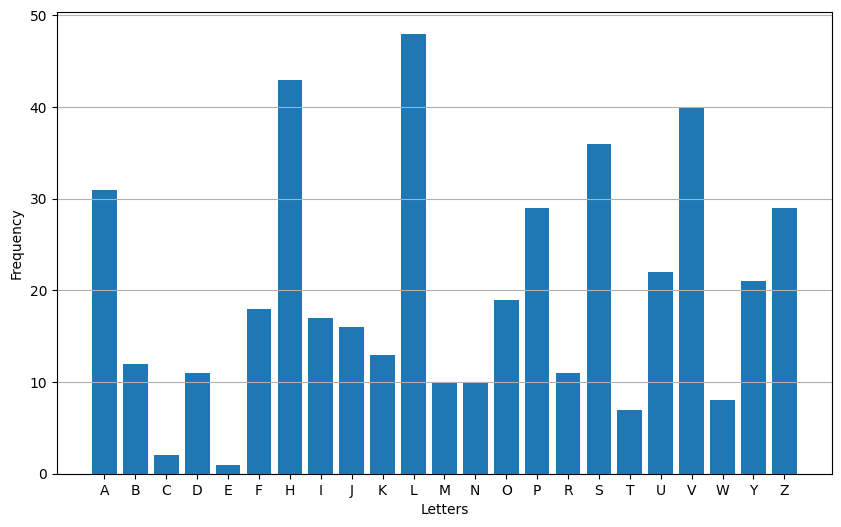

we can clearly see the same patterns just shifted by 7



In [106]:
import random
import string

# shift cipher
def shift_enc(pt : str, key : int):
    return [chr((ord(char) - ord('A') + key) % 26 + ord('A') ) for char in pt]

# generate random shift
def keygen_shift():
    return random.randint(1,26)

shift_k = keygen_shift()
shift_ct = shift_enc(plaintext, shift_k)

print(f"Using shift cipher with key: {shift_k}")
print(f"we will get ciphertext: {shift_ct[:10]}...")
print(f"with frequency diagram:")
freq_plot(shift_ct)
print(f"we can clearly see the same patterns just shifted by {shift_k}\n")

Using permutation cipher with key: [288, 323, 113, 437, 306, 301, 389, 139, 372, 90]...
we will get ciphertext: ['I', 'I', 'E', 'E', 'O', 'I', 'O', 'E', 'S', 'B']...
with frequency diagram:


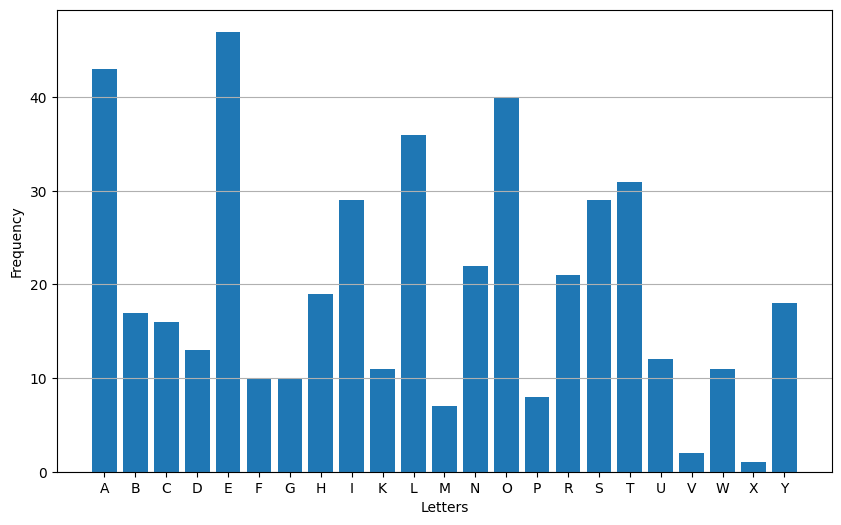

we can see there is no change compared to the plaintext diagram as permutation does not create any confusion



In [107]:
# permutation cipher
def perm_enc(pt : str, key : list[int]):
    ret = ["a" for i in range(0, len(pt)-1)]
    for from_idx, to_idx in enumerate(key):
        ret[to_idx] = pt[from_idx]
    return ret

# generate random permutation from 0 upto len
def keygen_perm(len : int):
    ret = [ i for i in range(0, len-1)]
    random.shuffle(ret)
    return ret

perm_k = keygen_perm(len(plaintext))
perm_ct = perm_enc(plaintext, perm_k)

print(f"Using permutation cipher with key: {perm_k[:10]}...")
print(f"we will get ciphertext: {perm_ct[:10]}...")
print(f"with frequency diagram:")
freq_plot(perm_ct)
print(f"we can see there is no change compared to the plaintext diagram as permutation does not create any confusion\n")

Using vigenere cipher with key: LKVCAEUIKN
we will get ciphertext: ['L', 'M', 'X', 'Q', 'R', 'H', 'C', 'V', 'Q', 'G']...
with frequency diagram:


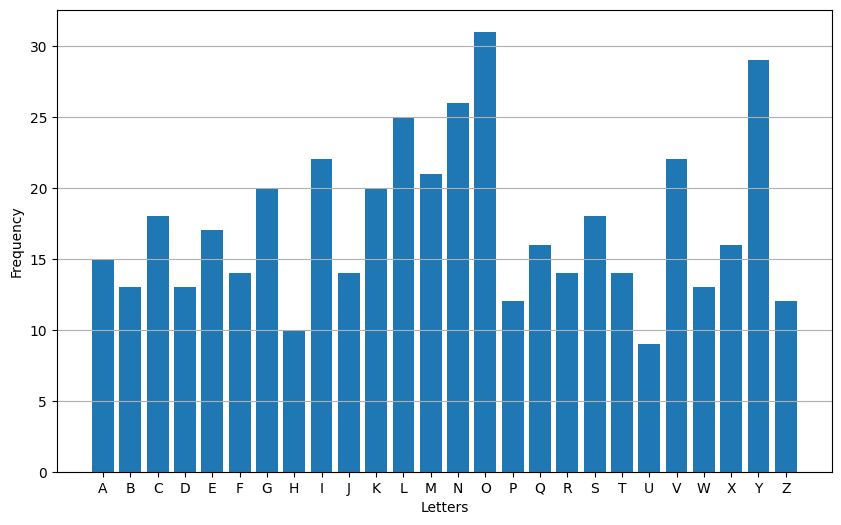

we can see no correlation of ctyphertext diagram to plaintext as vigenere creates great confusion
as plaintext nad key gets longer vigenere with random key converges to uniform distribution among all letters


In [108]:
# vigenere cipher
def vigenere_enc(pt : str, key : str):
    # convert to ints
    pt_int  = [ord(i) - ord('A') for i in pt]
    key_int = [ord(i) - ord('A') for i in key]

    ct_int = [(char + key_int[idx % len(key_int)]) % 26 for idx, char in enumerate(pt_int)]
    ct     = [chr(i + ord('A')) for i in ct_int]
    return ct

# generate len random letters
def keygen_vigenere(len : int):
    return ''.join([random.choice(string.ascii_uppercase) for i in range(0, len)])

vig_k = keygen_vigenere(10)
vig_ct = vigenere_enc(plaintext, vig_k)

print(f"Using vigenere cipher with key: {vig_k}")
print(f"we will get ciphertext: {vig_ct[:10]}...")
print(f"with frequency diagram:")
freq_plot(vig_ct)
print(f"we can see no correlation of ctyphertext diagram to plaintext as vigenere creates great confusion")
print(f"as plaintext nad key gets longer vigenere with random key converges to uniform distribution among all letters")

3. Analyse constructed diagrams and explain which properties help you to identify which encryption
scheme was used.

#### Shift cipher
- Frequency diagram is shifted but retains the same shape as the plaintext
 
#### Permutation cipher
- Frequency diagram is identical to the plaintext
 
#### Vigenere cipher
- Frequency diagram is randomized and converges to a uniform distribution

### Task 3
Assume you have used a time machine and you are back at Julius Caesar’s era. Now, you need
to help Julius Caesar in selecting better ways for sending secret messages to his military units. You may
select among the ones that have been discussed during this course up to Week 3 included (shift cipher,
substitution cipher, permutation cipher, affine cipher, Vigenère cipher, OTP). Provide an explanation for your
choice.

#### I would recommend Vigenere cipher
For its:
- Relative strength against frequancy analysis compared to shift or substitution ciphers
- Both encryption and decryption can be easily done by hand using vigenere square without
- Its much more practical than OTP or permutation as key can be of any length

- I would also recommend padding message with random amount of random characters form both start and end, because first and last words can be easily guessed. This would lead to overlaping part of key being compromised

- I would not recommend affine cipher - finding multiplicative inverses in roman numerals seems quite difficult 😄

### Task 4
Suppose you intercepted the following ciphertext c = 00010010 00000111 11101010. You know
that a 3-letter word was encrypted using one-time pad (to convert letters to binary strings ASCII table was
used). Can you bruteforce possible keys and learn the message that was encrypted?

In [109]:
print("We cannot bruteforce the key as there is no correlation between it and ciphertext")
print("plaintext length is only known variable (assuming it is not padded)")
ct = [0b00010010, 0b00000111, 0b11101010]
print("\nWe even can calculate key that produces any \"desired\" plaintext of the same length :)\n")

def otp_enc(pt: str, key: list[int]) -> list[int]:
    pt_int = [ord(char) for char in pt]
    ct_int = [pt_int[i] ^ key[i] for i in range(len(pt_int))]
    return ct_int

def otp_dec(ct: list[int], key: list[int]) -> str:
    pt_int = [ct[i] ^ key[i] for i in range(len(ct))]
    pt = ''.join([chr(i) for i in pt_int])
    return pt

def otp_desired_key(ct: list[int], pt: str) -> list[int]:
    pt_int = [ord(char) for char in pt]
    return [ct[i] ^ pt_int[i] for i in range(len(ct))]

print("For example:")
pt_a = ["cat", "map", "lab"]
for pt in pt_a:
    print(f'If we want to get plaintext \"{pt}\"')
    key = otp_desired_key(ct, pt)
    print(f'We can choose key = {key}')
    ct_i = [bin(i) for i in otp_enc(pt, key)]
    print(f"Enc({pt}, {key}) = {ct_i}\n")

We cannot bruteforce the key as there is no correlation between it and ciphertext
plaintext length is only known variable (assuming it is not padded)

We even can calculate key that produces any "desired" plaintext of the same length :)

For example:
If we want to get plaintext "cat"
We can choose key = [113, 102, 158]
Enc(cat, [113, 102, 158]) = ['0b10010', '0b111', '0b11101010']

If we want to get plaintext "map"
We can choose key = [127, 102, 154]
Enc(map, [127, 102, 154]) = ['0b10010', '0b111', '0b11101010']

If we want to get plaintext "lab"
We can choose key = [126, 102, 136]
Enc(lab, [126, 102, 136]) = ['0b10010', '0b111', '0b11101010']



## Task 5
You have intercepted the following ciphertext encrypted using Vigenere cipher. You have a cryptoanalyst friend who can help you break the cipher, but they asked you to find key length.

In [118]:
ct = "FHKOJASZAFUDTBJQLVMKFHKZKFWGACXWGGUMNGAVKSNWEWWNMPANKWHFHKUIXIJMFEUJLGZLEBJDOAOJMDUWTKOAEGDEZZAUNMBQAPKVPQAXTATEGLNQSYVKOKCIUMLCIAEHGXRKTUXQUNZVGIGXGHRITLQDSOVVTEXQITTJQTQCZQQZBABRQEBMUFHKXQXTKZIQIYBYMSCWTFHZEQXOISGPDUWTEATLCFROKMETGQTOAYMKRYUCOQTNQOIHKVAAUCMTQLGBGROXKNMSYPGIOATFPRUXYMSZMRMPKZDMSQMVEOTGQGRNMCPPATNDUMAHDOSCPPEXGQGRLMGFPKTVKOAEKFHHQVEOLKJMLQWTENKIMGPHMJUNJGQGITDKEIHTGSRGJAAUXVQEEGVFECXMGOHMWVKOAZEANQ"
# freq_plot(ct)

print("According to Historical-Ciphers.pdf:26")
print()
print("\"If there are similar groups of (at least 3) letters in the ciphertext")
print("Then the most probable explanation is that they correspond to")
print("similar groups of letters in the plaintext Hence,")
print("the difference in their positions in the text is divisible by m\"")
print()

def most_common_ngrams(text : str, n : int):
    ngrams = [text[i:i+n] for i in range(len(text) - n + 1)] # split text to all n-grams
    ngrams = Counter(ngrams).most_common()
    most_repetitions = ngrams[0][1]
    if most_repetitions > 1: # if there are some repeating
        # return ones withh most repetitions
        return list(filter( lambda a : a[1] == most_repetitions, ngrams))

ngrams = []
print("So i found that most common repeating n-grams are:")
for i in range(3, 6):
    ngrams.append(most_common_ngrams(ct, i))
    print(f"{i}-grams: {ngrams[-1:][0]}")

def substrings_indexes(s : str, sub : str):
    return [i for i in range(len(s)) if s.startswith(sub, i)]

def common_dividors(numbers: list[int]):
    ret = []
    for i in range(2, min(numbers) + 1):
        if all(num % i == 0 for num in numbers):  # Check if i divides all numbers
            ret.append(i)
    return ret

print(f"\nWe will try first 3-grams, as {ngrams[0][0][0]} is repeating {ngrams[0][0][1]} times")
idxs = substrings_indexes(ct, ngrams[0][0][0])
print(f"they are at indexes {idxs}")

spacing = []
for i in range(1, len(idxs)):
    spacing.append(idxs[i] -  idxs[i - 1])
divisors = common_dividors(spacing)

print(f"so theyre relative spacing is {spacing}")
print(f"with only common divisor {divisors}")
print(f"its highly propable that key is {divisors} long, but lets look at the 4-grams to be sure\n")

for i in range(0, 4):
    idxs = substrings_indexes(ct, ngrams[1][i][0])
    spacing = []
    for i in range(1, len(idxs)):
        spacing.append(idxs[i] - idxs[i - 1])
    
    divisors = common_dividors(spacing)
    print(f"Instances of {ngrams[1][i][0]} are at indexes {idxs}")
    print(f"so theyre relative spacing is {spacing} with divisors {divisors}\n")

key_len = 5
print(f"All of the them have relative spacing divisible by {key_len}")

According to Historical-Ciphers.pdf:26

"If there are similar groups of (at least 3) letters in the ciphertext
Then the most probable explanation is that they correspond to
similar groups of letters in the plaintext Hence,
the difference in their positions in the text is divisible by m"

So i found that most common repeating n-grams are:
3-grams: [('FHK', 4)]
4-grams: [('DUWT', 2), ('KOAE', 2), ('GQGR', 2), ('VKOA', 2)]
5-grams: None

We will try first 3-grams, as FHK is repeating 4 times
they are at indexes [0, 20, 55, 185]
so theyre relative spacing is [20, 35, 130]
with only common divisor [5]
its highly propable that key is [5] long, but lets look at the 4-grams to be sure

Instances of KOAE are at indexes [81, 216]
so theyre relative spacing is [135] with divisors [3, 5, 9, 15, 27, 45, 135]

Instances of KOAE are at indexes [85, 340]
so theyre relative spacing is [255] with divisors [3, 5, 15, 17, 51, 85, 255]

Instances of KOAE are at indexes [303, 328]
so theyre relative spacing

In [126]:
def ic(a : str):
    a_c = Counter(list(a))

    sum_l = 0
    for i in string.ascii_uppercase:
        sum_l += (a_c[i]/ len(a)) * ((a_c[i] - 1)/(len(a) - 1))
    return sum_l
    
for key_len in range(2, 11):
    pts = [""] * key_len
    for idx, i in enumerate(ct):
        pts[idx % key_len] += i
    sum_l = 0
    for i in pts:
        sum_l += ic(i)
        
    print(f"For key length {key_len}, average ic is {(sum_l / key_len):.3f}")

print()
print("Indices of coincidence being much closer to 0.065 (of english text) for 5 and 10 partial texts")
print("supports that key should be multiple of five long")

For key length 2, average ic is 0.043
For key length 3, average ic is 0.041
For key length 4, average ic is 0.042
For key length 5, average ic is 0.059
For key length 6, average ic is 0.040
For key length 7, average ic is 0.041
For key length 8, average ic is 0.044
For key length 9, average ic is 0.043
For key length 10, average ic is 0.059

Indices of coincidence being much closer to 0.065 (of english text) for 5 and 10 partila texts
supports that key should be multiple of five long


In [137]:
print("Assuming 5 long key, we can now express relations o partial keys as system of linear equations:")

def mutual_ic(a : str, b : str):
    a_c = Counter(list(a))
    b_c = Counter(list(b))

    sum_l = 0
    for i in string.ascii_uppercase:
        sum_l += (a_c[i]/ len(a)) * (b_c[i]/len(b))
    return sum_l

def vigenere_dec(ct : str, key : str):
    ct_int  = [ord(i) - ord('A') for i in ct]
    key_int = [ord(i) - ord('A') for i in key]

    pt_int = [(char - key_int[idx % len(key_int)]) % 26 for idx, char in enumerate(ct_int)]
    pt = [chr(i + ord('A')) for i in pt_int]
    return pt


# According to Historical-Ciphers.pdf:35
print("By measurring spikes in mutual index of coincidence between partial raw ciphertexts")
print("and other randomly decrypted parts. We can spot how they relate and obtain:")

pts = [""] * key_len
for idx, i in enumerate(ct):
    pts[idx % key_len] += i
cong = []
for i in range(0, key_len):
    k = None
    for j in range(i+1, key_len):
        for g in string.ascii_uppercase:
            tmp = mutual_ic( pts[i], vigenere_dec(pts[j], str(g)) )
            if tmp > 0.059: # 0.059523809523809005852
                char = ord(g) - ord('A')
                print(f"{chr(ord('A') + j)} - {chr(ord('A') + i)} == {char} (mod 26)")

print("and solve it as system of liner equations in Z26")
print("resulting in key = [i, i + 14, i + 20, i + 22, i + 16] with i in {0..25}")

Assuming 5 long key, we can now express relations o partial keys as system of linear equations:
By measurring spikes in mutual index of coincidence between partial raw ciphertexts
and other randomly decrypted parts. We can spot how they relate and obtain:
C - A == 20 (mod 26)
D - A == 22 (mod 26)
D - B == 8 (mod 26)
E - B == 2 (mod 26)
E - D == 20 (mod 26)
and solve it as system of liner equations in Z26
resulting in key = [i, i + 14, i + 20, i + 22, i + 16] with i in {0..25}


In [143]:
print("now we can try spot meaningful text in every i:")
for i in range(0, 26):
    key = [i, i + 14, i + 20, i + 22, i + 16]
    key = ''.join([chr(i % 26 + ord('A')) for i in key])
    pt = ''.join(vigenere_dec(ct, key)[:15])
    print(f"for key: {key} -> {pt}")
    if i == 12:
        print("and here it is    ^^^^^^^^^^^^^^^")
        break

now we can try spot meaningful text in every i:
for key: AOUWQ -> FTQSTAEFEPUPZFT
for key: BPVXR -> ESPRSZDEDOTOYES
for key: CQWYS -> DROQRYCDCNSNXDR
for key: DRXZT -> CQNPQXBCBMRMWCQ
for key: ESYAU -> BPMOPWABALQLVBP
for key: FTZBV -> AOLNOVZAZKPKUAO
for key: GUACW -> ZNKMNUYZYJOJTZN
for key: HVBDX -> YMJLMTXYXINISYM
for key: IWCEY -> XLIKLSWXWHMHRXL
for key: JXDFZ -> WKHJKRVWVGLGQWK
for key: KYEGA -> VJGIJQUVUFKFPVJ
for key: LZFHB -> UIFHIPTUTEJEOUI
for key: MAGIC -> THEGHOSTSDIDNTH
and here it is    ^^^^^^^^^^^^^^^


In [144]:
print( ''.join(vigenere_dec(ct, "MAGIC")) )

THEGHOSTSDIDNTHELPEITHERITWASALWAYSANASTYSHOCKWHENONEOFTHEMGLIDEDSUDDENLYTHROUGHADOORYOUWERETRYINGTOOPENNEARLYHEADLESSNICKWASALWAYSHAPPYTOPOINTNEWGRYFFINDORSINTHERIGHTDIRECTIONBUTPEEVESTHEPOLTERGEISTWASWORTHTWOLOCKEDDOORSANDATRICKSTAIRCASEIFYOUMETHIMWHENYOUWERELATEFORCLASSHEWOULDDROPWASTEPAPERBASKETSONYOURHEADPULLRUGSFROMUNDERYOURFEETPELTYOUWITHBITSOFCHALKORSNEAKUPBEHINDYOUINVISIBLEGRABYOURNOSEANDSCREECHGOTYOURCONK
